In [ ]:
!pip install yfinance

Names: Ousama Batais & John Thomas
NetIDs: oxb220001 & jxt200031

In [ ]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Function to download historical data for a given stock
def get_stock_data(ticker):
    data = yf.download(ticker, start="1994-01-01", end="2024-01-01", interval="1mo")
    data = data['Close'].dropna()  # Keep only closing prices and drop NaN values
    return data

# Example: Get historical data for Apple (AAPL)
ticker = "AAPL"
stock_data = get_stock_data(ticker)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Ensure all data is numeric
stock_data = stock_data.astype(float)

print(stock_data.head(20))  # Check the first 20 rows of the dataset
print(stock_data.tail(20))  # Check the last 20 rows of the dataset
print(stock_data.info())    # Verify the data types and non-null counts

Ticker                         AAPL
Date                               
1994-01-01 00:00:00+00:00  0.292411
1994-02-01 00:00:00+00:00  0.325893
1994-03-01 00:00:00+00:00  0.296875
1994-04-01 00:00:00+00:00  0.267857
1994-05-01 00:00:00+00:00  0.261161
1994-06-01 00:00:00+00:00  0.236607
1994-07-01 00:00:00+00:00  0.300781
1994-08-01 00:00:00+00:00  0.323103
1994-09-01 00:00:00+00:00  0.300781
1994-10-01 00:00:00+00:00  0.385603
1994-11-01 00:00:00+00:00  0.332589
1994-12-01 00:00:00+00:00  0.348214
1995-01-01 00:00:00+00:00  0.360491
1995-02-01 00:00:00+00:00  0.352679
1995-03-01 00:00:00+00:00  0.314732
1995-04-01 00:00:00+00:00  0.341518
1995-05-01 00:00:00+00:00  0.371094
1995-06-01 00:00:00+00:00  0.414621
1995-07-01 00:00:00+00:00  0.401786
1995-08-01 00:00:00+00:00  0.383929
Ticker                           AAPL
Date                                 
2022-05-01 00:00:00+00:00  148.839996
2022-06-01 00:00:00+00:00  136.720001
2022-07-01 00:00:00+00:00  162.509995
2022-08-01 00:00:0

### Strategy Simulation

In [ ]:
# Signal Generation Function
def generate_signals(data, short_window=5, long_window=20):
    # Ensure it's a DataFrame with column "Price"
    # If 'data' is already a DataFrame, rename the first column to 'Price'
    if isinstance(data, pd.DataFrame):
        data = data.rename(columns={data.columns[0]: 'Price'})
    else:
        # If 'data' is a Series, convert it to a DataFrame with column name 'Price'
        data = data.to_frame(name="Price")

    data['SMA_short'] = data['Price'].rolling(window=short_window).mean()
    data['SMA_long'] = data['Price'].rolling(window=long_window).mean()
    data['Signal'] = np.where(data['SMA_short'] > data['SMA_long'], 'Buy', 'Sell')

    # Drop rows with NaN values
    data.dropna(inplace=True)

    # Debugging signals
    print(data.tail(10))  # Last 10 rows of signal data
    return data

In [ ]:
# Ensure stock_data is in the correct format and has the 'Price' column
if isinstance(stock_data, pd.Series):
    stock_data = stock_data.to_frame(name="Price")  # Convert Series to DataFrame if necessary
else:
    stock_data.rename(columns={stock_data.columns[0]: 'Price'}, inplace=True)  # Rename column to 'Price'

# Generate signals
signals = generate_signals(stock_data, short_window=5, long_window=20)

# Display results
print(signals.head(10))
print(signals.tail(10))

Ticker                          Price   SMA_short    SMA_long Signal
Date                                                                
2023-03-01 00:00:00+00:00  164.899994  146.911996  154.477499   Sell
2023-04-01 00:00:00+00:00  169.679993  151.241995  155.369998   Sell
2023-05-01 00:00:00+00:00  177.250000  160.705997  157.157498    Buy
2023-06-01 00:00:00+00:00  193.970001  170.641998  159.365998    Buy
2023-07-01 00:00:00+00:00  196.449997  180.449997  160.923498    Buy
2023-08-01 00:00:00+00:00  187.869995  185.043997  161.438497    Buy
2023-09-01 00:00:00+00:00  171.210007  185.350000  161.259998    Buy
2023-10-01 00:00:00+00:00  170.770004  184.054001  161.542498    Buy
2023-11-01 00:00:00+00:00  189.949997  183.250000  162.309498    Buy
2023-12-01 00:00:00+00:00  192.529999  182.466000  164.053498    Buy
Ticker                        Price  SMA_short  SMA_long Signal
Date                                                           
1995-08-01 00:00:00+00:00  0.383929   0.3825

In [ ]:
# Buy and Hold Strategy Simulation
def simulate_buy_and_hold(data):
    monthly_investment = 1000
    total_invested = 0
    total_shares = 0

    # Iterate over the 'Price' column values
    for price in data['Price']:
        total_invested += monthly_investment
        total_shares += monthly_investment / price

    # Calculate the final portfolio value using the last price
    final_value = total_shares * data['Price'].iloc[-1]
    return final_value, total_invested

In [ ]:
def simulate_active_trading(data):
    monthly_investment = 1000
    cash = 0
    shares = 0
    position = "Sell"  # Start with cash

    print(f"{'Month':<10}{'Price':<10}{'Signal':<10}{'Position':<10}{'Cash':<15}{'Shares':<10}")
    for i in range(len(data)):
        price = data['Price'].iloc[i]
        signal = data['Signal'].iloc[i]

        # Print current state for debugging
        print(f"{i + 1:<10}{price:<10.2f}{signal:<10}{position:<10}{cash:<15.2f}{shares:<10.4f}")

        if signal == 'Buy' and position == "Sell":
            shares = cash / price
            cash =- price
            position = "Buy"
        elif signal == 'Sell' and position == "Buy":
            cash = shares * price
            shares = 0
            position = "Sell"

        # Monthly investment
        if signal == 'Buy':
            cash += monthly_investment
            shares += cash / price
            cash =- price
        elif signal == 'Sell':
            cash += monthly_investment

    # Compute total equity
    final_stock_price = data['Price'].iloc[-1]
    total_equity = cash + (shares * final_stock_price)

    # Print final results
    print(f"Final Cash: {cash:.2f}, Final Shares: {shares:.4f}, Final Stock Price: {final_stock_price:.2f}, Total Equity: {total_equity:.2f}")
    return total_equity, cash + (shares * final_stock_price)

In [ ]:
# Annual Return Calculation Function
def calculate_annual_return(final_value, total_invested, years=30):
    if total_invested == 0:
        return 0  # Avoid division by zero
    return ((final_value / total_invested) ** (1 / years)) - 1

In [ ]:
# Simulate Strategies
bh_final_value, bh_total_invested = simulate_buy_and_hold(signals)
at_final_value, at_total_invested = simulate_active_trading(signals)

# Debugging Active Trading Results
print(f"AT Final Value: {at_final_value}, Total Invested: {at_total_invested}")

# Calculate annual percent return
bh_annual_return = calculate_annual_return(bh_final_value, bh_total_invested)
at_annual_return = calculate_annual_return(at_final_value, at_total_invested)

# Print the results
print(f"Buy and Hold Final Value: ${bh_final_value:.2f}, Annual Return: {bh_annual_return:.2%}")
print(f"Active Trading Final Value: ${at_final_value:.2f}, Annual Return: {at_annual_return:.2%}")

Month     Price     Signal    Position  Cash           Shares    
1         0.38      Buy       Sell      0.00           0.0000    
2         0.33      Buy       Buy       -0.38          2603.6482 
3         0.32      Buy       Buy       -0.33          5609.2078 
4         0.34      Buy       Buy       -0.32          8692.5170 
5         0.28      Sell      Buy       -0.34          11629.2676
6         0.25      Sell      Sell      4309.67        0.0000    
7         0.25      Sell      Sell      5309.67        0.0000    
8         0.22      Sell      Sell      6309.67        0.0000    
9         0.22      Sell      Sell      7309.67        0.0000    
10        0.23      Sell      Sell      8309.67        0.0000    
11        0.19      Sell      Sell      9309.67        0.0000    
12        0.20      Sell      Sell      10309.67       0.0000    
13        0.22      Sell      Sell      11309.67       0.0000    
14        0.20      Sell      Sell      12309.67       0.0000    
15        

### Output

Streaming output truncated to the last 5000 lines.
40        0.29      Buy       Buy       -0.33          152490.2539
41        0.37      Buy       Buy       -0.29          155995.9438
42        0.37      Buy       Buy       -0.37          158731.0444
43        0.31      Buy       Buy       -0.37          161449.3187
44        0.32      Buy       Buy       -0.31          164665.3697
45        0.41      Buy       Buy       -0.32          167780.9182
46        0.39      Buy       Buy       -0.41          170214.9213
47        0.41      Buy       Buy       -0.39          172755.7224
48        0.50      Buy       Buy       -0.41          175173.1273
49        0.58      Buy       Buy       -0.50          177183.5182
50        0.57      Buy       Buy       -0.58          178899.1408
51        0.72      Buy       Buy       -0.57          180667.1138
52        0.87      Buy       Buy       -0.72          182064.1391
53        0.92      Buy       Buy       -0.87          183207.6371
54        0

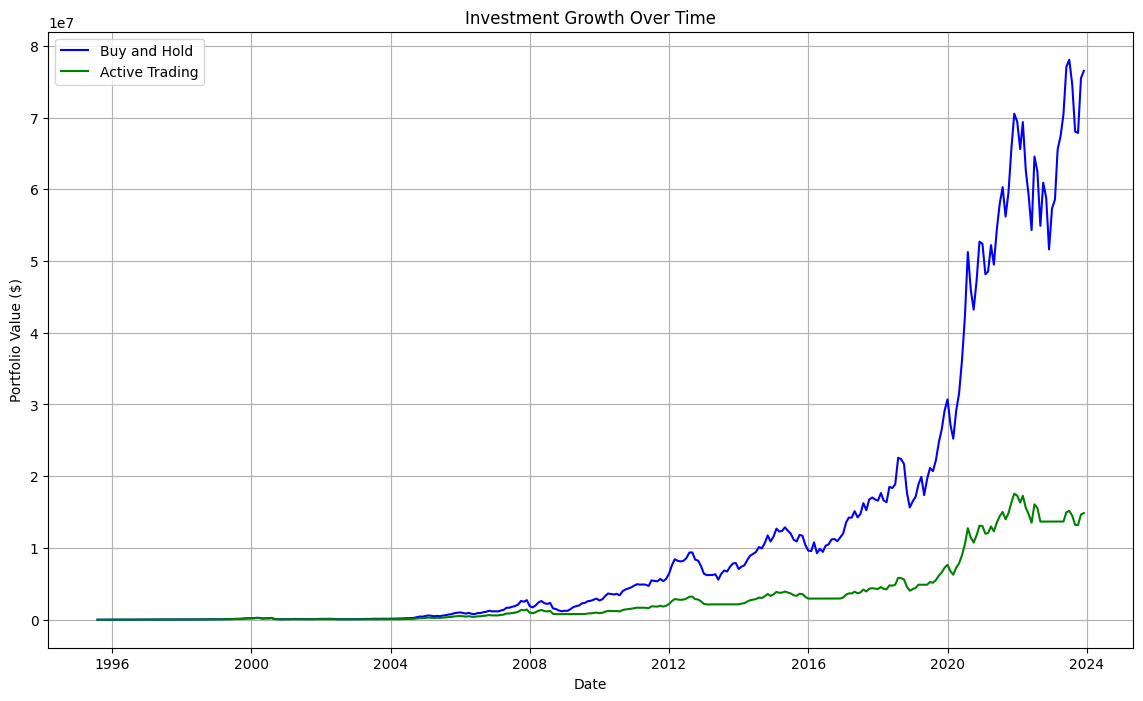

In [ ]:
# Plotting the growth of money
def plot_growth(stock_data, signals):
    # Use the intersection of dates from stock_data and signals
    dates = stock_data.index.intersection(signals.index)  # Changed line

    bh_cumulative = [simulate_buy_and_hold(stock_data.loc[dates[:i + 1]])[0] for i in range(len(dates))]  # Changed line
    at_cumulative = [simulate_active_trading(signals.loc[dates[:i + 1]])[0] for i in range(len(dates))]  # Changed line

    plt.figure(figsize=(14, 8))
    plt.plot(dates, bh_cumulative, label='Buy and Hold', color='blue')
    plt.plot(dates, at_cumulative, label='Active Trading', color='green')
    plt.title('Investment Growth Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid()
    plt.show()

plot_growth(stock_data, signals)